# Project: Medical Appointments No-Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information on more than 110k medical appointments scheduled in Brazil in 2016. According to the data source [1], the following variables regarding appointments and patients are available for each entry in the dataset:

- Patient ID
- Appointment ID
- Gender of the patient
- Age of the patient
- Neighbourhood where the appointment takes place
- Scholarship: whether or not the patient receives help from the social welfare program Bolsa Familia [2]
- Hypertension: whether or not the patient suffers from this disease
- Diabetes: whether or not the patient suffers from this disease
- Alcoholism: whether or not the patient suffers from this disease 
- Handicap: number of disabilities that the patient has 
- Date when the appointment was scheduled
- Date of the actual appointment
- SMS received: whether or not the patient received a reminder of the appointment by SMS

Finally, there is a dependent variable that determines whether the patient attended the appointment or not. 

The goal of this analysis is to explore which factors are associated with a patient attending a medical appointment. Some possible questions to support this analysis are:

- How does appointment attendance vary according to the patient's age and gender? Do women attend more than men? Do older people attend more than younger people? 
- Do people with pre-existing illnesses (hypertension, diabetes, alcoholism) or with a disability tend to respect medical appointments more?
- Do people who receive help from the government tend to go to the doctor more than those who do not?
- Do people who receive an SMS reminder tend to miss less appointments?

In [166]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add the magic keyword for matplotlib to show visualizations in the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First, we'll load the dataset `no_show_appointments.csv`, which was downloaded from Kaggle [1] and saved in the current working directory. 

In [2]:
# Load dataset and show first entries
df = pd.read_csv("no_show_appointments.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that the columns correspond to the variables mentioned in the introduction section. It is important to mention that the last variable, named "No-show", takes the following values: 
- "No": means that the patient attended the appointment.
- "Yes": means that the patient did not attend the appointment.

It makes sense to transform these string values to numbers, so that `Yes` maps to 1 and `No` maps to 0. The following cell performs this operation.

In [3]:
# Map "No-show" column string values to 0/1
df['No-show'] = df['No-show'].map(lambda x: 1 if x == 'Yes' else 0) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Below we'll explore the data statistics in more detail.

In [4]:
# Check shape of dataset (number of columns and entries)
df.shape

(110527, 14)

In [5]:
# Check data types and see if there is missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


As we can see, the dataset consists of 14 columns and 110527 entries, none of which contains null values. In the following cell we'll look for duplicated entries in order to remove them. 

In [6]:
# Check for duplicates
sum(df.duplicated())

0

There seems to be no duplicates, so there's no need to delete entries for now. Next, we'll observe the statistical description of the quantitative variables:

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In the description we can see that the average age of the patients is around 37 years, but as a minimum value we have -1, which is ambiguous to understand. At the same time, the oldest patient appears to be 115 years old, which is also rare. We will analyze the `Age` column in more detail. If we perform a search to see which entries correspond to `Age = -1`, we get the following result:

In [8]:
# Search for entries with Age = -1
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,0


Since the result is a single entry, we can assume that the corresponding age is wrong and therefore we will remove it:

In [9]:
index = 99832 # index corresponding to entry with Age = -1
df.drop(index, inplace=True)  # drop entry

df.query('Age == -1') # check if it was correctly deleted

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


We'll inspect now the entries corresponding to `Age = 115`:

In [10]:
# Search for entries with Age = 115
df.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,1
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,1
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,1
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,0
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,0


As in this case we only have 2 different patients, we can assume that the age values are incorrect and therefore remove these entries.

In [11]:
indexes = [63912, 63915, 68127, 76284, 97666] # indexes corresponding to entry with Age = 115
df.drop(indexes, inplace=True)  # drop entries

df.query('Age == 115') # check if entries were correctly deleted

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Before we continue with the analysis, we'll drop the columns that are not necessary to answer the questions we initially posed: `PatientId`, `AppointmentID`, `ScheduledDay`, `AppointmentDay` and `Neighbourhood`. Also, we'll fix the typo in the `Handcap` and `Hipertension` columns, and replace the hyphen in the `No-show` column with an underscore.

In [12]:
# Drop unnecessary columns
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"], axis=1, inplace=True)

# Fix typos 
df.rename({"Handcap":"Handicap", "Hipertension":"Hypertension", "No-show":"No_show"}, axis=1, inplace=True)

# Add underscore
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


As the final step of this Data Wrangling section, we'll plot the histograms of the variables in our dataset to make a quick visual inspection on them.

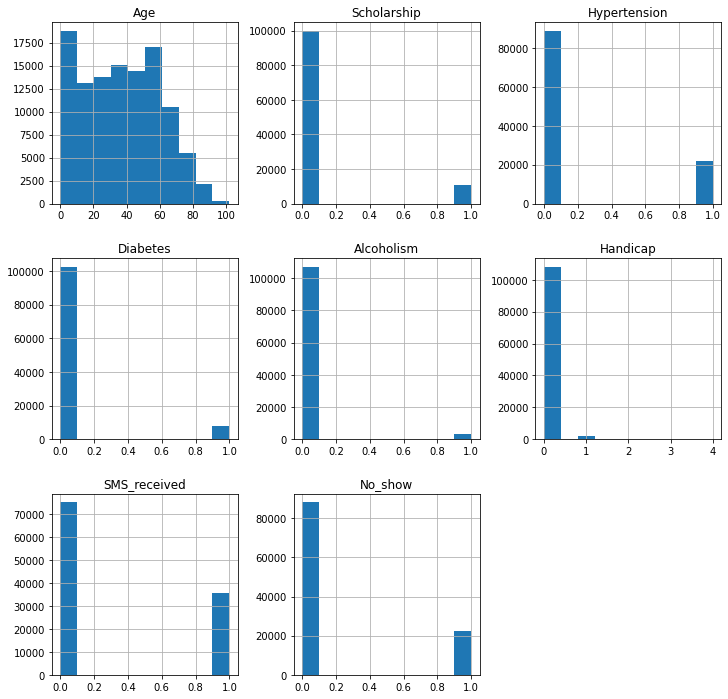

In [13]:
df.hist(figsize=(12,12)); 

We can see that most of the variables only take two values (0/1), except for `Age` and `Handicap`. In the case of the `Handicap` column, its possible values are:

In [14]:
df["Handicap"].value_counts() # values of the Handicap column

0    108284
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

According to the data source [3], the values the `Handicap` column takes correspond to the number of disabilities a patient has, ranging from 0 (no disabilities) to 4 (four different impairments).

As a final remark, we can observe that there are no outliers in the cleaned dataset. The final size of the dataset is: 

In [15]:
df.shape

(110521, 9)

<a id='eda'></a>
## Exploratory Data Analysis

To begin our analysis, we'll calculate how many appointments were actually attended and how many were not.

In [16]:
df["No_show"].value_counts()

0    88205
1    22316
Name: No_show, dtype: int64

We see that the number of attended appointments is considerably higher than the number of no-shows. This can be observed more clearly in the following pie chart, where the corresponding percentages are shown:

<AxesSubplot:title={'center':'Appointments'}>

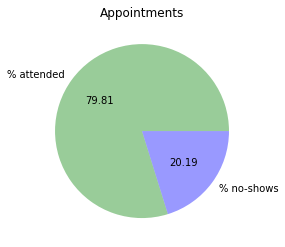

In [165]:
df["No_show"].value_counts().plot(kind="pie", autopct='%.2f', labels=["% attended", "% no-shows"], title="Appointments", ylabel="", figsize=(4,4), colors=["g", "b"], wedgeprops={'alpha':0.4})

Next, we'll define masks that will help to select the entries corresponding to attended and not attended appointments:

In [18]:
# Define masks for attended appointments and no-shows
attended = df["No_show"] == 0
no_show = df["No_show"] == 1

### Q1: How does appointment attendance vary according to the patient's age and gender?

First, we'll analyze the data corresponding to gender. In the following figure, we can see on the left the number of attended  appointments (in blue) and the number of no-shows (in green) for each gender (men and women). In the figure on the right we can observe the mean value of no-shows in each case.

Female no-shows mean: 
0.2031210847231116
Male no-shows mean: 
0.19967947889471915


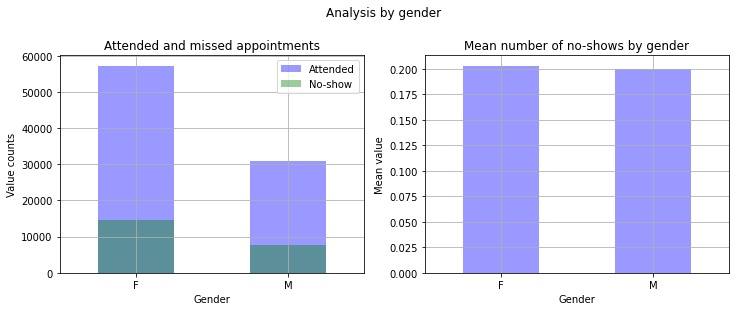

In [101]:
# Plot analysis by gender
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Analysis by gender", y=1.05);

df.Gender[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.Gender[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["F", "M"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Value counts")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("Gender")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["F", "M"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows by gender")
axes[1].grid()

# Calculate mean values of no-shows for each gender 
print("Female no-shows mean: ")
print(len(df.query('Gender == "F" & No_show == 1'))/len(df.query('Gender == "F"')))
print("Male no-shows mean: ")
print(len(df.query('Gender == "M" & No_show == 1'))/len(df.query('Gender == "M"')))

We can see that women schedule almost twice as many appointments as men to go to the doctor. However, the percentage of attendance is very similar in both cases, being even slightly higher in the case of men.

In the following graph we'll see the distribution of attended and missed appointments according to the patient's age.

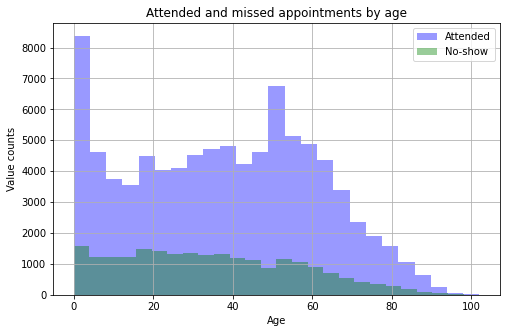

In [140]:
# Plot analysis by age
df.Age[attended].hist(bins=25, color="b", alpha=0.4);
df.Age[no_show].hist(bins=25,  color="g", alpha=0.4, figsize=(8,5));

plt.xlabel("Age");
plt.ylabel("Value counts");
plt.title("Attended and missed appointments by age");
plt.legend(["Attended", "No-show"]);

We can observe that in both cases (attended appointments and no-shows), the distribution is skewed to the right. This means that the highest number of medical appointments is scheduled for relatively young people, since from the age of 60 on, the amount of appointments decreases.
In the case of attended appointments, a peak is observed in the first years of life (babies and very young children), and another one around the age of 50.
In any case, there does not seem to exist a certain age range in which the percentage of non-shows is considerably higher. If we calculate the mean age both for attended appointments and no-shows, we obtain: 

In [22]:
df.Age[attended].mean()

37.7887534720254

In [23]:
df.Age[no_show].mean()

34.30682021867718

We see that the average age in both cases is quite similar, being slightly lower in the case of no-shows. 
Now we'll observe how the attended and not-attended appointments are distributed by both age and gender. 

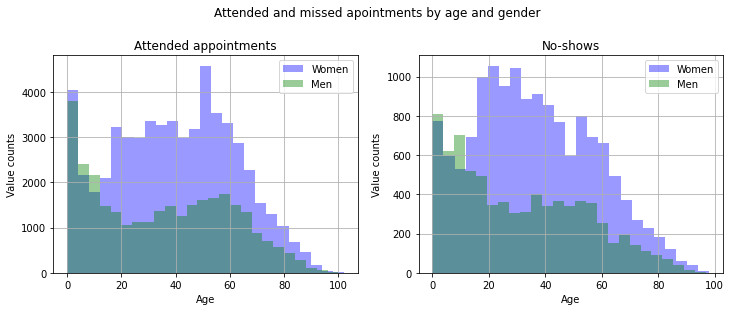

In [157]:
# Plot distribution of patients age and gender
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Attended and missed apointments by age and gender", y=1.05);

df.query('Gender == "F" & No_show == 0')["Age"].hist(ax=axes[0], bins=25, color="b", alpha=0.4);
df.query('Gender == "M" & No_show == 0')["Age"].hist(ax=axes[0], bins=25, color="g", alpha=0.4, figsize=(12,4));
axes[0].legend(["Women" , "Men"]);
axes[0].set_xlabel("Age");
axes[0].set_ylabel("Value counts");
axes[0].set_title("Attended appointments");

df.query('Gender == "F" & No_show == 1')["Age"].hist(ax=axes[1], bins=25, color="b", alpha=0.4);
df.query('Gender == "M" & No_show == 1')["Age"].hist(ax=axes[1], bins=25, color="g", alpha=0.4, figsize=(12,4));
axes[1].legend(["Women" , "Men"]);
axes[1].set_xlabel("Age");
axes[1].set_ylabel("Value counts");
axes[1].set_title("No-shows");

We see that in all cases the graphs are also skewed to the right. 
In the case of women, the highest number of no-shows ocurrs between the ages 20-40, while for men this happens in the earliest age range (0-20).

### Q2: Do people with pre-existing illnesses or disabilities have higher attendance to medical appointments?

In the following we'll analyze what happens with the attendance to medical appointments in the case of patients with pre-existing diseases (diabetes, hypertension and alcoholism) and disabilities. 

In the figures below, we'll see the number of attended appointments and no-shows in the case of patients with or without a certain disease. We'll also observe the mean value of no-shows in each case. We'll start with diabetes, continue with hypertension and finally analyze the case of patients with alcoholism.

Patients with diabetes no-shows mean: 
0.18003273322422259
Patients without diabetes no-shows mean: 
0.20361091072159723


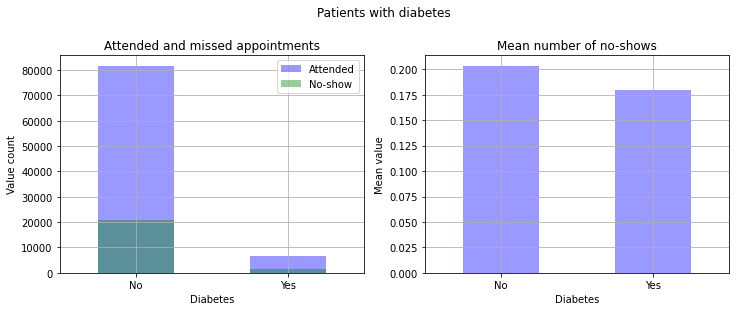

In [159]:
# Plot graphs corresponding to patients with diabetes
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Patients with diabetes", y=1.05);

df.Diabetes[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.Diabetes[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("Diabetes")
axes[0].set_ylabel("Value count")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("Diabetes")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows")
axes[1].grid()

# Calculate mean value of no-shows for patients with and without diabetes
print("Patients with diabetes no-shows mean: ")
print(len(df.query('Diabetes == 1 & No_show == 1'))/len(df.query('Diabetes == 1')))
print("Patients without diabetes no-shows mean: ")
print(len(df.query('Diabetes == 0 & No_show == 1'))/len(df.query('Diabetes == 0')))

We can observe that patients with diabetes represent a considerably reduced fraction of the total. The mean number of no-shows is lower in patients who suffer the disease, although the difference with non-diabetic patients isn't too significant (around 2%).

Next, we'll analyze the case of patients with hypertension.

Patients with hypertension no-shows mean: 
0.1730275229357798
Patients without hypertension no-shows mean: 
0.20901477665941548


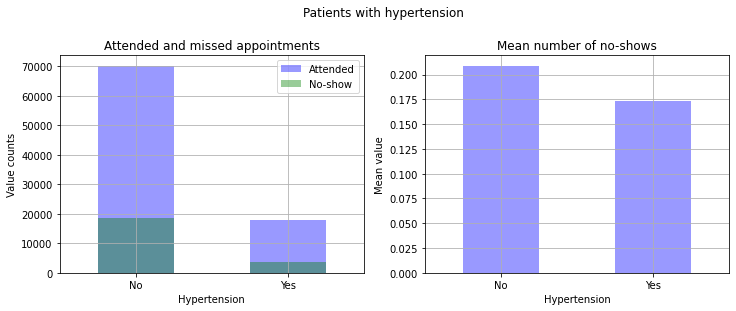

In [164]:
# Plot graphs corresponding to patients with hypertension
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Patients with hypertension", y=1.05);

df.Hypertension[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.Hypertension[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("Hypertension")
axes[0].set_ylabel("Value counts")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("Hypertension")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows")
axes[1].grid()

# Calculate mean value of no-shows for patients with and without hypertension
print("Patients with hypertension no-shows mean: ")
print(len(df.query('Hypertension == 1 & No_show == 1'))/len(df.query('Hypertension == 1')))
print("Patients without hypertension no-shows mean: ")
print(len(df.query('Hypertension == 0 & No_show == 1'))/len(df.query('Hypertension == 0')))

Here we see that the fraction of patients with hypertension is higher than in the case of diabetes. However, the same phenomenon occurs: the mean value of no-shows is lower in the case of patients with the disease, but not significantly (around 3%).

In the next step, we'll analyze the case of patients who suffer alcoholism.

Patients with alcoholism no-shows mean: 
0.20148809523809524
Patients without alcoholism no-shows mean: 
0.20192980655275708


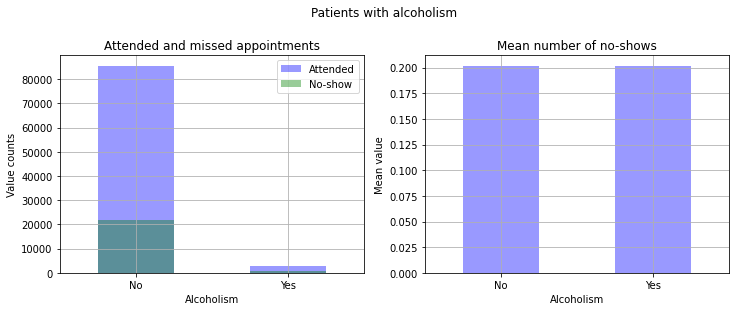

In [161]:
# Plot graphs corresponding to patients with alcoholism
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Patients with alcoholism", y=1.05);

df.Alcoholism[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.Alcoholism[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("Alcoholism")
axes[0].set_ylabel("Value counts")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("Alcoholism")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows")
axes[1].grid()

# Calculate mean value of no-shows for patients with and without alcoholism
print("Patients with alcoholism no-shows mean: ")
print(len(df.query('Alcoholism == 1 & No_show == 1'))/len(df.query('Alcoholism == 1')))
print("Patients without alcoholism no-shows mean: ")
print(len(df.query('Alcoholism == 0 & No_show == 1'))/len(df.query('Alcoholism == 0')))

We can see that alcoholism is the least frequent of the three studied diseases. The average number of no-shows is practically the same for patients who suffer alcoholism and for those who don't.

Finally, we'll study what happens in the case patients with disabilities.

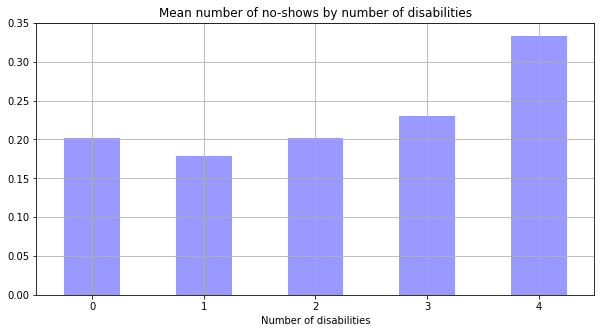

In [74]:
# Plot graph for patients with disabilities
df.groupby("Handicap")["No_show"].mean().plot(kind="bar",  color="b", alpha=0.4,  figsize=(10,5));

plt.title("Mean number of no-shows by number of disabilities")
plt.xlabel("Number of disabilities")
plt.xticks(rotation='horizontal')
plt.grid()

Here we can observe that, on average, patients without disabilities miss more medical appointments than patients with a single disability, but present the same amount of no-shows as patients with 2 different impairments. 
In the case of patients with 3 disabilities onwards, the number of no-shows starts to be higher.

### Q3: Do people who receive help from the government tend to respect the appointments more?

Let's now analyze what happens with patients who receive financial assistance from the government, the Bolsa Familia program.
The graph below shows on the left the number of attended appointments and no-shows for those who receive the scholarship and those who don't. In the figure on the right we can see the mean value of no-shows for both cases.

Mean value of no-shows for patients with scholarship: 
0.2373630420771568
Mean value of no-shows for patients without scholarship:  
0.19805338149709012


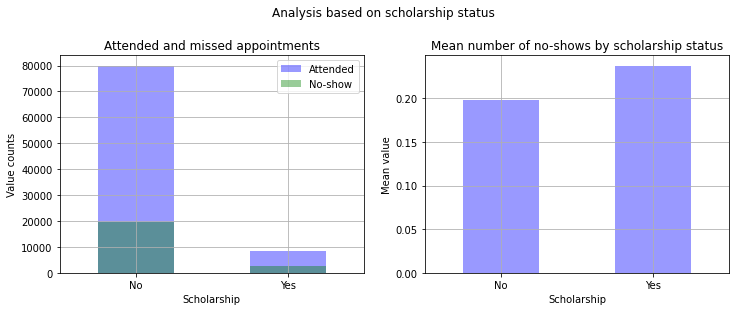

In [162]:
# Plots for analysis based on scholarship status
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Analysis based on scholarship status", y=1.05);

df.Scholarship[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.Scholarship[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("Scholarship")
axes[0].set_ylabel("Value counts")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("Scholarship")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows by scholarship status")
axes[1].grid()

# Calculate mean value of no-shows for patients with or without scholarship
print("Mean value of no-shows for patients with scholarship: ")
print(len(df.query('Scholarship == 1 & No_show == 1'))/len(df.query('Scholarship == 1')))
print("Mean value of no-shows for patients without scholarship:  ")
print(len(df.query('Scholarship == 0 & No_show == 1'))/len(df.query('Scholarship == 0')))

We can observe that only a small part of the patients receives financial assistance from the Bolsa Familia program. These patients tend to miss more medical appointments (about 4%) than those who don't receive government assistance.

### Q4: Do people who receive an SMS reminder tend to miss less appointments?

Finally, we want to take a look at the situation of patients who received an SMS reminder prior to the appointment.

We'll plot below the number of attended and missed appointments distinguishing between those who received the SMS and those who did not. We'll also calculate the mean value of no-shows in both cases.

Mean value of no-shows for patients who received SMS: 
0.27575322003325725
Mean value of no-shows for patients who didn't receive SMS: 
0.1670042643923241


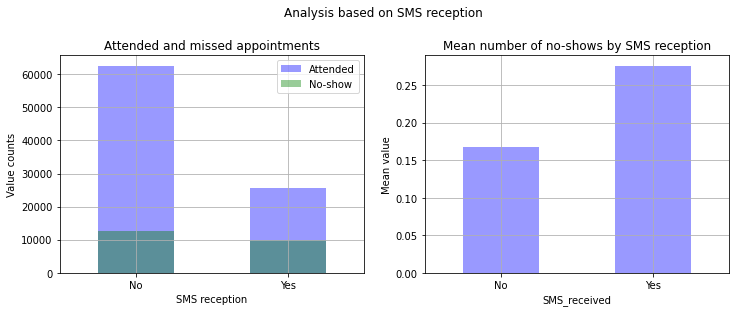

In [163]:
# Plots for analysis based on SMS reception
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Analysis based on SMS reception", y=1.05);

df.SMS_received[attended].value_counts().plot(kind="bar", ax=axes[0], color="b", alpha=0.4);
df.SMS_received[no_show].value_counts().plot(kind="bar", ax=axes[0], color="g", alpha=0.4,  figsize=(12,4));
axes[0].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[0].legend(["Attended" , "No-show"])
axes[0].set_xlabel("SMS reception")
axes[0].set_ylabel("Value counts")
axes[0].set_title("Attended and missed appointments")
axes[0].grid()

df.groupby("SMS_received")["No_show"].mean().plot(ax=axes[1], kind="bar", color="b", alpha=0.4,  figsize=(12,4));
axes[1].set_xticklabels(["No", "Yes"], rotation="horizontal")
axes[1].set_ylabel("Mean value")
axes[1].set_title("Mean number of no-shows by SMS reception")
axes[1].grid()

# Calculate mean value of no-shows for patients with and without SMS reminder
print("Mean value of no-shows for patients who received SMS: ")
print(len(df.query('SMS_received == 1 & No_show == 1'))/len(df.query('SMS_received == 1')))
print("Mean value of no-shows for patients who didn't receive SMS: ")
print(len(df.query('SMS_received == 0 & No_show == 1'))/len(df.query('SMS_received == 0')))

Contrary to what can be expected, it can be seen that people who receive the SMS reminder beforehand tend to miss the appointment more (around 9% on average) than those who do not receive it.

<a id='conclusions'></a>
## Conclusions

In this report we presented the results of analyzing the medical appointments dataset of Brazil in 2016. First, a preliminary statistical analysis of the variables present in the dataset was performed in order to carry out the data wrangling and cleaning for the subsequent exploratory analysis. 

The conclusions obtained after studying the dataset to answer the questions initially posed are presented in the following.

- Although the average number of no-shows observed is slightly higher in the case of women, a significant difference in the number of missed appointments according to the patient's gender could not be found.
- There was also no great difference observed between the average age of patients who attend their appointments and those who do not, the former being 37 years old and the latter 34 years old. By making a distinction according to gender, it was observed that women between 20 and 40 years of age to miss more medical appointments than those in other age ranges, while in the case of men this happens in the first years of life (0-20).
- When studying patients who suffer from pre-existing diseases (diabetes, hypertension and alcoholism), it was noted that in general they tend to miss fewer appointments than patients without the diseases, except in the case of alcoholism, where the average value of no-shows observed was practically the same for patients with and without the disease. 
- In the case of patients with disabilities, it was observed that those with a single impairment missed fewer appointments on average, also in comparison to patients without disabilities. An increase in the number of no-shows is observed as the number of disabilities a patient suffers increases. 
- Contrary to what might be expected, it was observed that people who receive government assistance from the Bolsa Familia program attend their medical appointments on average 4% less than those patients who don't receive the scholarship.
- Finally, it was observed that those patients who receive an SMS reminder prior to their medical appointments tend to miss them 9% more on average than those who don't receive the reminder.

As a final comment, the completion of this project helped to consolidate the concepts learned about the data analysis process, applied to a real case study.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Bibliography

[1] https://www.kaggle.com/joniarroba/noshowappointments

[2] https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

[3] https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356

[4] https://matplotlib.org/

[5] https://pandas.pydata.org/

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])